In [1]:
import re
import os
import glob
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('pdf', fonttype=42)
import seaborn as sns

In [2]:
known_motifs = glob.glob("*/DMR_bed/*/knownResults.txt")

In [3]:
motif_pvalue = defaultdict(dict)
for motif_result in known_motifs:
    result_df = pd.read_csv(motif_result, sep="\t", index_col=0)
    result_df.index = [x.split("/")[0] for x in result_df.index]
    
    cell_type = motif_result.split("/")[-4]
    hyp, cond = motif_result.split("/")[-2].split("_")[1:]
    for motif, row in result_df.iterrows():
        if row['P-value'] < 0.01:
            motif_pvalue[motif][f'{hyp}_{cell_type}_{cond}'] = row['P-value']

In [4]:
motif_pvalue_df = pd.DataFrame.from_dict(motif_pvalue, orient='index')

In [5]:
dense_motif = -np.log10(motif_pvalue_df.sort_index(axis=1).sort_index()).dropna(thresh=10).fillna(0)
sparse_motif = -np.log10(motif_pvalue_df.loc[~motif_pvalue_df.index.isin(dense_motif.index)]).sort_index(axis=1).sort_index().fillna(0)

In [6]:
sparse_motif = sparse_motif.loc[sparse_motif.astype(int).sum(axis=1)>5]

In [7]:
dense_motif['Motif'] = dense_motif.index
dense_motif_melt = dense_motif.melt(var_name='Group', id_vars='Motif', value_name='P-Value')
dense_motif_melt['Cell'] = [x.split("_")[1] for x in dense_motif_melt['Group']]

In [8]:
sparse_motif['Motif'] = sparse_motif.index
sparse_motif_melt = sparse_motif.melt(var_name='Group', id_vars='Motif', value_name='P-Value')
sparse_motif_melt['Cell'] = [x.split("_")[1] for x in sparse_motif_melt['Group']]

In [9]:
color_plate = sns.color_palette("tab10")

cell2color = {'B-Mem': color_plate[0],
             'B-Naive': color_plate[0],
             'Monocyte': color_plate[1],
              'Monocyte1': color_plate[1],
             'NK-cell1': color_plate[2],
             'NK-cell2': color_plate[2],
             'Tc-Mem': color_plate[3],
             'Tc-Naive': color_plate[4],
             'Th-Mem': color_plate[5],
             'Th-Naive': color_plate[6]}

In [10]:
dense_motif_melt.replace(0, np.nan, inplace=True)
sparse_motif_melt.replace(0, np.nan, inplace=True)

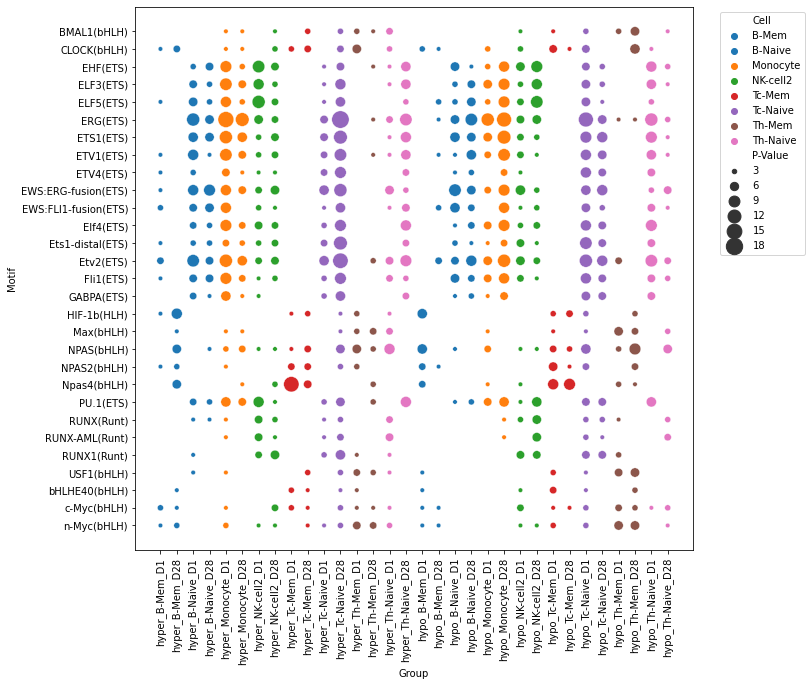

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
ax = sns.scatterplot(data=dense_motif_melt, x='Group', y='Motif', size='P-Value', hue='Cell', palette=cell2color, ax=ax, sizes=(20, 300))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation=90)
plt.savefig("dense_Motif_bubblePlot.pdf")

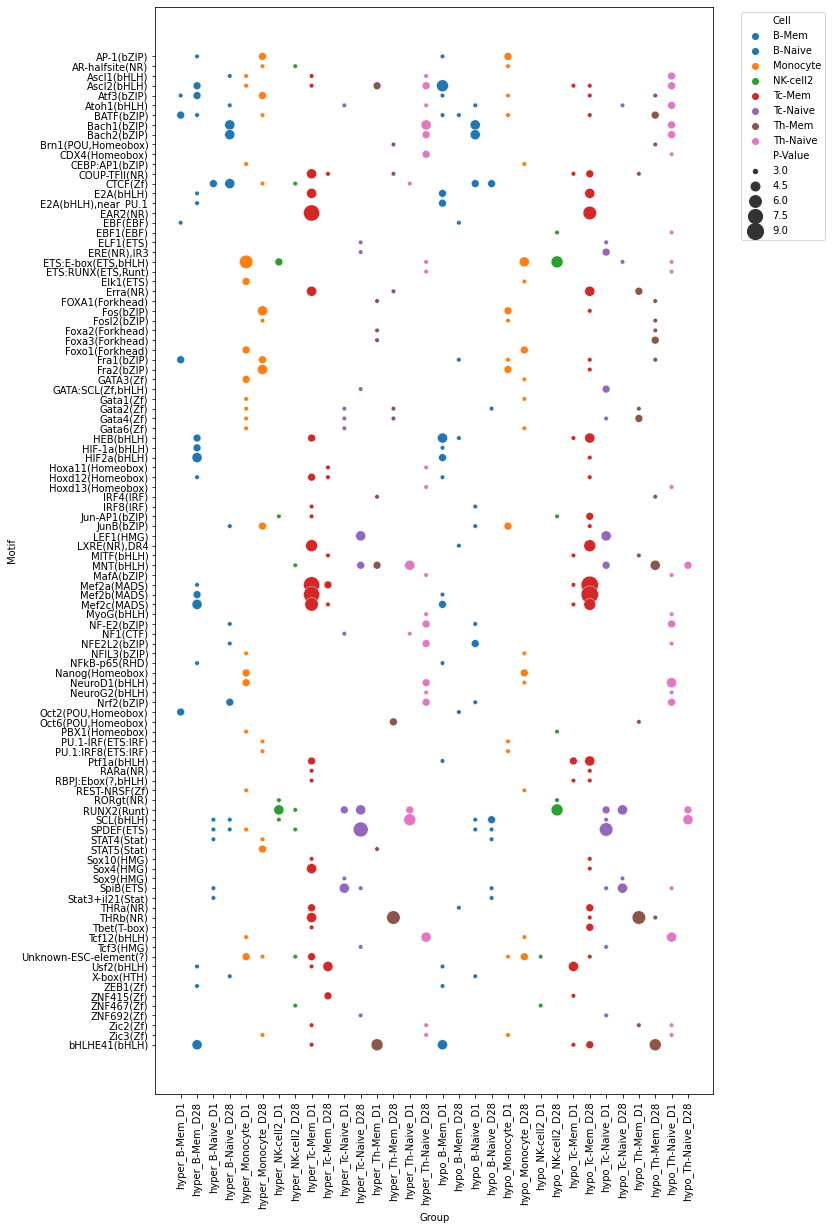

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10, 20))
ax = sns.scatterplot(data=sparse_motif_melt, x='Group', y='Motif', size='P-Value', hue='Cell', palette=cell2color, ax=ax, sizes=(20, 300))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation=90)
plt.savefig("sparse_Motif_bubblePlot.pdf")

In [13]:
selected_motifs = [x for x in sparse_motif.index if 'Mef2' in x or 'ETS' in x or 'CTCF' in x]

In [14]:
combined_motifs = pd.concat([sparse_motif.loc[selected_motifs], dense_motif])

In [15]:
combined_motifs

,hyper_B-Mem_D1,hyper_B-Mem_D28,hyper_B-Naive_D1,hyper_B-Naive_D28,hyper_Monocyte_D1,hyper_Monocyte_D28,hyper_NK-cell2_D1,hyper_NK-cell2_D28,hyper_Tc-Mem_D1,hyper_Tc-Mem_D28,...,hypo_NK-cell2_D28,hypo_Tc-Mem_D1,hypo_Tc-Mem_D28,hypo_Tc-Naive_D1,hypo_Tc-Naive_D28,hypo_Th-Mem_D1,hypo_Th-Mem_D28,hypo_Th-Naive_D1,hypo_Th-Naive_D28,Motif
CTCF(Zf),-0.0,-0.0,4.0,5.0,-0.0,3.0,-0.0,3.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,CTCF(Zf)
ELF1(ETS),-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,3.0,-0.0,-0.0,-0.0,-0.0,-0.0,ELF1(ETS)
"ETS:E-box(ETS,bHLH)",-0.0,-0.0,-0.0,-0.0,7.0,-0.0,4.0,-0.0,-0.0,-0.0,...,6.0,-0.0,-0.0,-0.0,3.0,-0.0,-0.0,3.0,-0.0,"ETS:E-box(ETS,bHLH)"
"ETS:RUNX(ETS,Runt)",-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,3.0,-0.0,"ETS:RUNX(ETS,Runt)"
Elk1(ETS),-0.0,-0.0,-0.0,-0.0,4.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,Elk1(ETS)
Mef2a(MADS),-0.0,3.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,9.0,4.0,...,-0.0,3.0,10.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,Mef2a(MADS)
Mef2b(MADS),-0.0,4.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,9.0,-0.0,...,-0.0,-0.0,10.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,Mef2b(MADS)
Mef2c(MADS),-0.0,5.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,7.0,3.0,...,-0.0,3.0,6.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,Mef2c(MADS)
PU.1-IRF(ETS:IRF),-0.0,-0.0,-0.0,-0.0,-0.0,3.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,PU.1-IRF(ETS:IRF)
PU.1:IRF8(ETS:IRF),-0.0,-0.0,-0.0,-0.0,-0.0,3.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,PU.1:IRF8(ETS:IRF)


In [16]:
new_motif_ids = [f'{x.split("(")[1]}_{x.split("(")[0]}' for x in combined_motifs.index]
new_motif_ids = [re.sub("\)", "", x) for x in new_motif_ids]

In [17]:
combined_motifs = combined_motifs.rename(index=dict(zip(combined_motifs.index, new_motif_ids)))
combined_motifs = combined_motifs.sort_index()

In [18]:
combined_motifs['Motif'] = combined_motifs.index
combine_motif_melt = combined_motifs.melt(var_name='Group', id_vars='Motif', value_name='P-Value')
combine_motif_melt['Cell'] = [x.split("_")[1] for x in combine_motif_melt['Group']]

In [19]:
combine_motif_melt.replace(0, np.nan, inplace=True)

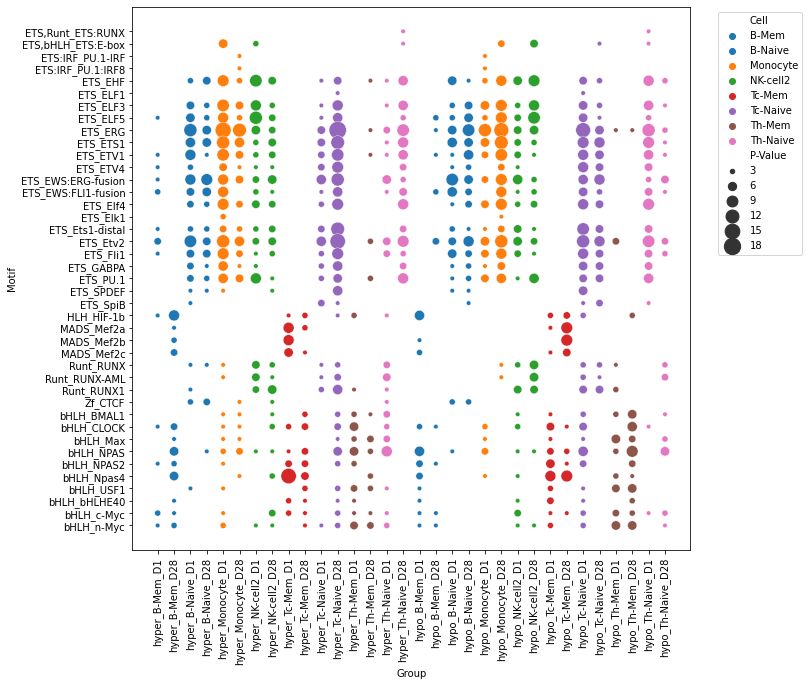

In [21]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
ax = sns.scatterplot(data=combine_motif_melt, x='Group', y='Motif', size='P-Value', hue='Cell', palette=cell2color, ax=ax, sizes=(20, 300))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation=90)
plt.savefig("combine_Motif_bubblePlot.pdf")